# Gerchberg–Saxton alghotihm

In [1]:
import numpy as np
import torch
import cv2 
import matplotlib.pyplot as plt

# Import utils
import sys
sys.path.append('./..')
from utils import *

In [20]:
campo_optico = campo_de_prueba()
# campo_optico = field_from_image('../Archivos/imagenes/image_4.jpg')

# planos imagen y fase
plano_imagen = np.abs(campo_optico)
fase  = np.angle(campo_optico)


objeto_original  = tajada(np.abs(campo_optico),np.zeros((800,800)),-480,0)

# Coeficientes de correlación
corr_amplitud = []
corr_fase = []

# Gerchberg–Saxton 
for _ in range(20):

    aprox_obj = tfourier(torch.from_numpy(np.exp(1j * fase)))
    aprox_hol = itfourier(torch.from_numpy(np.abs(campo_optico) * np.exp(1j * np.angle(aprox_obj) )) )

    fase = np.angle(aprox_hol)
    
    imagen_holograma = tfourier(torch.from_numpy(bin(fase)))
    Objeto_holograma = tajada(abs(imagen_holograma),np.zeros((800,800)),-480,0)


    corr_amplitud.append(corr2(torch.from_numpy(objeto_original),Objeto_holograma))
    corr_fase.append(corr2(torch.from_numpy(objeto_original),tajada(abs(aprox_obj),np.zeros((800,800)),-480,0)))

# plt.imshow(np.abs(objeto_original), cmap='gray')

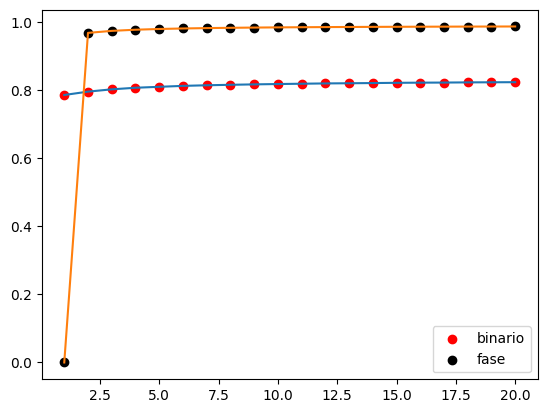

In [22]:
y = np.array(corr_amplitud)
x = np.arange(1,len(y)+1, 1)
z = np.array(corr_fase)

plt.scatter(x,y,color="red",label="binario")
plt.scatter(x,z,color="black",label="fase")
plt.plot(x,y)
plt.plot(x,z)

plt.legend()

[Video](https://www.youtube.com/watch?v=momXpSbOqMQ)

<p><img alt="GS" width="500" height="180" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Gerchberg-Saxton_algorithm.jpg/600px-Gerchberg-Saxton_algorithm.jpg" align="left" hspace="15px" ></p>